In [1]:
import pymongo
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
mongo_cl = pymongo.MongoClient()
db = mongo_cl['steam']

In [3]:
users = [u for u in db.users.find({}, {"_id":False})]

In [4]:
users_df = pd.DataFrame(users)

KeyboardInterrupt: 

In [4]:
len(users)

8449

In [5]:
num_ratings = sum(len([g for g in x['games'] if g['playtime_forever']>0]) for x in users)
num_ratings

2231462

In [ ]:
users_df['num_games'] = [len([g for g in x['games'] if g['playtime_forever']>0]) for x in users]
users_df['num_games']

In [ ]:
users_df['num_games'].describe()

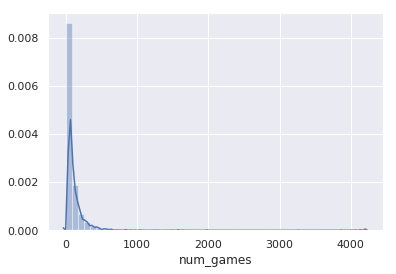

In [34]:
sns.distplot(users_df['num_games'])

In [23]:

users_df[users_df.num_games  > 100].sort_values('num_games', ascending=False).iloc[0]['games']

[{'appid': 300,
  'name': 'Day of Defeat: Source',
  'playtime_forever': 450,
  'img_icon_url': '062754bb5853b0534283ae27dc5d58200692b22d',
  'img_logo_url': 'e3a4313690bd551495a88e1c01951eb26cec7611',
  'has_community_visible_stats': True,
  'playtime_windows_forever': 0,
  'playtime_mac_forever': 0,
  'playtime_linux_forever': 0},
 {'appid': 240,
  'name': 'Counter-Strike: Source',
  'playtime_forever': 159,
  'img_icon_url': '9052fa60c496a1c03383b27687ec50f4bf0f0e10',
  'img_logo_url': 'ee97d0dbf3e5d5d59e69dc20b98ed9dc8cad5283',
  'has_community_visible_stats': True,
  'playtime_windows_forever': 0,
  'playtime_mac_forever': 0,
  'playtime_linux_forever': 0},
 {'appid': 20,
  'name': 'Team Fortress Classic',
  'playtime_forever': 28,
  'img_icon_url': '38ea7ebe3c1abbbbf4eabdbef174c41a972102b9',
  'img_logo_url': '515bc393c861d91b9165f0697040c015f50bcb5e',
  'has_community_visible_stats': True,
  'playtime_windows_forever': 0,
  'playtime_mac_forever': 0,
  'playtime_linux_forever': 

In [24]:
from collections import Counter


In [26]:
game_counter = Counter()
game_playtime_counter = Counter()
for u in users:
    for g in u['games']:
        if g['playtime_forever'] > 0:
            game_counter[g['name']] += 1
            game_playtime_counter[g['name']] += g['playtime_forever']

In [27]:
game_counter.most_common(20)

[('Counter-Strike: Global Offensive', 2516),
 ('Dota 2', 1978),
 ('Team Fortress 2', 1734),
 ('Left 4 Dead 2', 1308),
 ('PAYDAY 2', 1287),
 ("PLAYERUNKNOWN'S BATTLEGROUNDS", 1240),
 ("Garry's Mod", 1149),
 ('Unturned', 1135),
 ('Warframe', 1016),
 ('Paladins', 967),
 ('Rocket League', 949),
 ('Portal 2', 909),
 ('Grand Theft Auto V', 906),
 ('Z1 Battle Royale', 845),
 ('Path of Exile', 824),
 ('Rust', 787),
 ('Terraria', 787),
 ('Brawlhalla', 786),
 ('Borderlands 2', 743),
 ('Counter-Strike: Source', 735)]

In [28]:
game_playtife_counter.most_common(20)

[('Dota 2', 234394439),
 ('Counter-Strike: Global Offensive', 148190919),
 ("PLAYERUNKNOWN'S BATTLEGROUNDS", 20514767),
 ('Team Fortress 2', 20141274),
 ('Rocket League', 14350420),
 ("Garry's Mod", 11168987),
 ('Counter-Strike: Source', 11110207),
 ('Counter-Strike', 11001341),
 ('Rust', 10022904),
 ('Grand Theft Auto V', 9163011),
 ('Path of Exile', 8571472),
 ('Arma 3', 8056348),
 ('Warframe', 7032688),
 ("Tom Clancy's Rainbow Six Siege", 6592425),
 ('Brawlhalla', 5390618),
 ('ARK: Survival Evolved', 4968492),
 ('PAYDAY 2', 4701556),
 ('Terraria', 4413042),
 ('DayZ', 3696390),
 ('The Elder Scrolls V: Skyrim', 3674063)]

In [35]:
len(game_playtife_counter)

12979